In [172]:
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import Image
import matplotlib.font_manager as fm
my_font=fm.FontProperties(fname="C:\Windows\Fonts\simkai.ttf",size=16) 

## 一、磁场作用于NV使悬臂梁受力：
<font size=4> $\color{red} {1. 磁场中磁矩的能量：E=- \vec{\mu}\cdot\vec{B}，F_z=\frac{\partial{E}}{\partial{z}}}$ 。</font> <br />
<font size=4> $\frac{轨道磁矩}{轨道角动量}=\frac{-e}{2m_ec}$，$\frac{自旋磁矩}{自旋角动量}=\frac{-e}{m_ec}$，玻尔磁子$\mu_B=\frac{e\hbar}{2m_ec}=9.27*10^{-24}J/T$ <br />
 $S=1$的自旋，$\mu_S=\frac{-e}{m_ec}S$，所以$\mu_S=\frac{-\mu_B*2*\hbar}{\hbar}$。

<font size=4>$\color{red} {2. 假设磁场沿Z轴方向}$，$F_z=-\frac{\partial E}{\partial z}=2\mu_B \frac{\partial B}{\partial z}$，假设磁场梯度为0.5T/m，那么$F_z=2\mu_B*0.5T/m=9.27*10^{-24}N $。</font> <br />

<font size=4>$\color{red} {悬臂梁振子示意图：}$

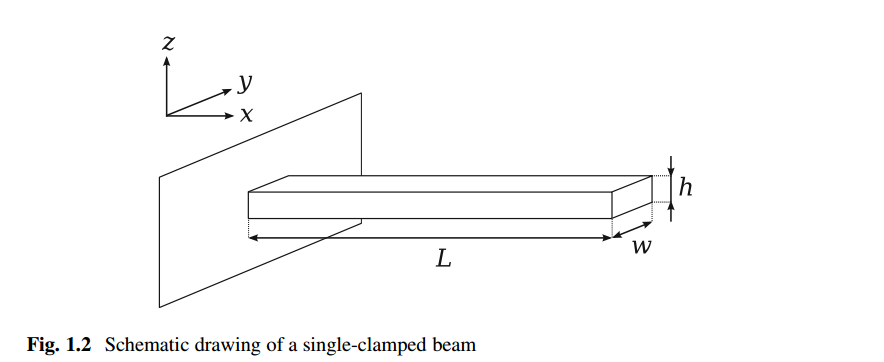

In [173]:
PATH = "C:/Users/sunhuanying/Desktop/CSRC/Tex for Cantilever/Figures/"
Image(filename = PATH +"fig002.png", width=600, height=400)

<font size=4> $\color{red} {3.1.悬臂梁振子的频率:}$<br />
$$\begin{equation}
\begin{aligned}
 f_n&=\frac{\lambda_n^2}{L^2}\sqrt{\frac{EI_y}{\rho A}}\\
I_y&=Ah^2/12\\
\lambda_n&=\beta_n L=1.8751,4.6941,7.8548,(2n-1)\pi/2
\end{aligned}
\end{equation}
$$<br />
$f_n$是角频率，频率时为$f_n/2\pi$取第一模式，$f_1=\frac{1.8751^2*h}{L^2}\sqrt{\frac{E}{12\rho}}$，金刚石密度$\rho=3.5g/cm^3$。<br/>
<font size=4> $\color{red} {3.2. 当有外加作用时，p为单位长度的重量（包含了重力）,悬臂梁振子的频率:}$
$$\begin{equation}
\begin{aligned}
f_n&=\frac{K_n}{2\pi}\sqrt{\frac{EI_yg}{p l^4}}\\
I_y&=Ah^2/12\\
K_n&=3.52,22.0,61.7,121,200,...,\sqrt{(2n-1)\pi/2}
\end{aligned}
\end{equation}
$$

<font size=4>$\color{black} {4.}$ 假设NV-Center自旋密度 $\rho=10^{15}个/cm^3 $，金刚石密度$\rho=3.5g/cm^3$，弹性模量$E=1100GPa$，振子宽度$w=10\mu m$，厚度$h=4\mu m$，$g=9.8m/s^2$ 是重力加速度。频率移动和悬臂梁振子长度L的关系为:<br />

In [174]:
h=6.626*1e-34
hbar=h/(2*np.pi)
k_B=1.38*1e-23
lamda_n=1.8751
g=9.8
E=1100*1e9
rho=3500
w=10*1e-6              # width of cantilever
h=4*1e-6               # thickness of cantilever
I_y=w*h**3/12          # moment of inertia
A=w*h
K_1=3.52

In [175]:
L_ini=1e-6
L_end=50*1e-6                              # changing the length of cantilever
L_num=101
L_vec = np.linspace(L_ini,L_end,L_num)
omega_gravity=rho*w*h*g
omega_NV=1e21*w*h*2*9.27*1e-21             # gradient of magnetic field 1000T/m.
omega=omega_NV+omega_gravity 
f_origin_list= []
f_strain_list= []
Delta_f_list = []
for L in L_vec:
    #f_origin_1=lamda_n**2/L**2*np.sqrt(E*I_y/(rho*A));
    f_origin =K_1/(2*np.pi)*np.sqrt(E*I_y*g/(omega_gravity*L**4))
    f_strain = K_1/(2*np.pi)*np.sqrt(E*I_y*g/(omega*L**4))
    Delta_f = f_origin-f_strain
    f_origin_list.append(f_origin)
    f_strain_list.append(f_strain)
    Delta_f_list.append(Delta_f)

In [176]:
print(('%.8e\n''%.8e\n' '%.8e') % (omega_gravity,omega_NV,omega))

1.37200000e-06
7.41600000e-10
1.37274160e-06


In [177]:
L_vec=L_vec*1e6
f_origin_list=np.array(f_origin_list)/1e6
f_strain_list=np.array(f_strain_list)/1e6
Delta_f_list=np.array(Delta_f_list)/1e6

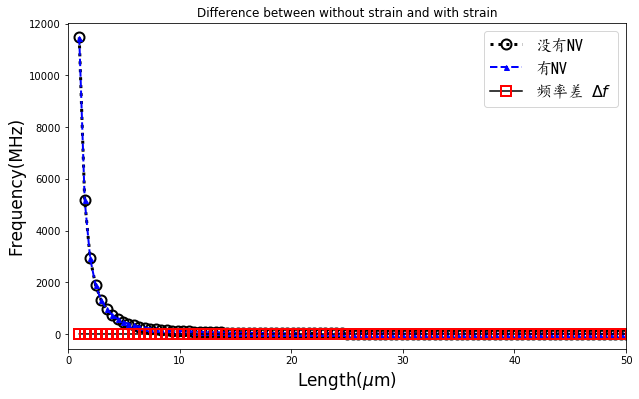

In [178]:
plt.subplots(1,1,figsize = (10,6))
ln1, = plt.plot(L_vec,f_origin_list,color = 'k', linewidth = 3.0, linestyle = ':',
               marker='o', markersize=10, markerfacecolor='none',markeredgewidth = 2)
ln2, = plt.plot(L_vec,f_strain_list,color = 'blue', linewidth = 2.0,linestyle = '--',marker='^',markersize='5')
ln3, = plt.plot(L_vec,Delta_f_list,'ks-',markersize='10',color='black', markerfacecolor='none', markeredgecolor='red',markeredgewidth = 2)
plt.xlabel('Length($\mu$m)',fontsize=17)
plt.ylabel('Frequency(MHz)',fontsize=17)
plt.title('Difference between without strain and with strain')
plt.legend(handles=[ln1, ln2, ln3], labels=['没有NV', '有NV','频率差 $\Delta f$ '],
    loc='upper right',prop=my_font)
plt.xlim(0,50)
plt.show()

<Figure size 432x288 with 0 Axes>

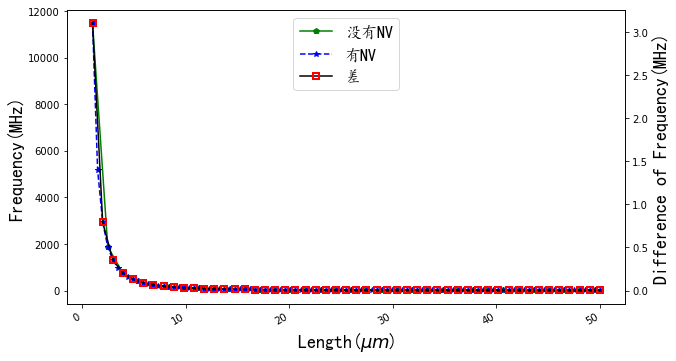

In [179]:
#Delta_f_list=np.ones((L_num,1))
plt.gcf().set_facecolor(np.ones(4) * 0/255)#设置背景色
fig, ax1 = plt.subplots(1,1,figsize = (10,6)) # 使用subplots()创建窗口

ln1, = ax1.plot(L_vec[0:L_num:3],f_origin_list[0:L_num:3],'p-', color='g',markersize='6', linewidth = 1.5) #绘制折线图像1,圆形点，标签，线宽
ln2, = ax1.plot(L_vec,f_strain_list,color = 'b', linewidth =1.5,linestyle = '--',marker='*',markersize='6')
ax2  = ax1.twinx() # 创建第二个坐标轴
ln3, = ax2.plot(L_vec[0:L_num:2],Delta_f_list[0:L_num:2],'ks-',markersize='6',
                color='black',markerfacecolor='none', markeredgecolor='red',markeredgewidth = 2) #同上

plt.legend(handles=[ln1, ln2,ln3], labels=['没有NV', '有NV','差'],loc='upper center',prop=my_font)
ax1.set_xlabel('Length($\mu m$)', fontproperties=my_font,size=18)
ax1.set_ylabel('Frequency(MHz)', fontproperties=my_font,size=18)
ax2.set_ylabel('Difference of Frequency(MHz)', fontproperties=my_font,size=18)
plt.gcf().autofmt_xdate()#自动适应刻度线密度，包括x轴，y轴
plt.show()

(0, 30)

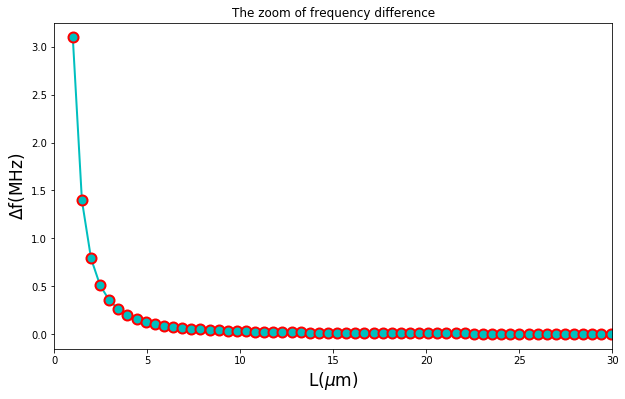

In [180]:
plt.subplots(1,1,figsize = (10,6))
plt.plot(L_vec,Delta_f_list,color = 'c', linewidth = 2.0, linestyle = '-',
         marker='o',markersize='10',markeredgecolor='r',markeredgewidth = 2)
plt.xlabel('L($\mu$m)',fontsize=17)
plt.ylabel('$\Delta$f(MHz)',fontsize=17)
plt.title('The zoom of frequency difference')
plt.xlim(0,30)
# plt.ylim(0,10)
#L_v=range(0,100,10)
#list(L_v)

In [181]:
N=41
X=N*(L_end-L_ini)/(L_num-1)
Q=f_origin_list[N]/(Delta_f_list[N]*4) # 假设4分之1线宽的频率变化能被探测到。
#f_origin_list[]
print(('Length of Cantilever = %e micrometer')%(X*1e6))
print(('Frequency without NV = %eMHz \n' 'Difference = %eMHz\n' 'Quality factor = %d')% (f_origin_list[N],Delta_f_list[N],Q))
#ratio=1-np.sqrt(1-(omega_NV*A*L_vec[N]**2/(K_n**2*E*I_y)))
#print(('D = %.8e Hz')%(ratio*f_origin_list[N]))

Length of Cantilever = 2.009000e+01 micrometer
Frequency without NV = 2.578347e+01MHz 
Difference = 6.965478e-03MHz
Quality factor = 925


## 二、温度主导 : 
<font size=4>$\color{red}{1. \Delta F_{th}=\sqrt{\frac{4kk_BT}{Q\pi f_0\tau_s}}, \Delta E_{th}=\frac{1}{2}\frac{(\Delta F_{th})^2}{k}=\frac{2k_BT}{Q\pi f_0\tau_s}.}$  </font> <br />
<font size=4>弹性系数$k=\frac{3EI_y}{L^3}$，$k_B=1.38*10^{-23}J/K$玻尔兹曼常数，T：温度，$f_0$：振子频率，Q：品质因子，衰减时间$\tau_0=Q/\pi f_0$，$\tau_s=2/\Delta f$ 积分时间，$\Delta f=2/\tau_0=2\pi f_0/Q$。</font>  <br />
热力学引起的涨落$\Delta F=k*\Delta X$，引起的频率变化$\Delta f=\frac{\sqrt{g}}{2\pi}(\sqrt{\frac{1}{L+\Delta X}}-\sqrt{\frac{1}{L}})$引起振子频率变化。

In [182]:
T=60*1e-3  # temperature
k=3*E*I_y/L_vec[N]**3
t_s=2/Delta_f_list[N]
f_0=f_origin_list[N]
Delta_E=2*k*k_B*T/(Q*np.pi*f_0*t_s)
Delta_X_thermal=np.sqrt(2*k_B*T*Q*Delta_f_list[N]/(k*np.pi*f_0))
# omega_2=k*Delta_X_thermal/(L_vec[N])+omega_gravity
# Delta_f_thermal=K_n/(2*np.pi)*np.sqrt(E*I_y*g/(omega_2*L_vec[N]**4))
print('Delta F=%e' % (k*Delta_X_thermal))

Delta F=4.972407e-20


## 三、结论
<font size=4> 在磁场梯度为1000T/m，单个NV所获得的外力$F=2\mu_B \frac{\partial B}{\partial z}=2*9.27*10^{-24}N$。热涨落的影响导致$F \sim 10^{-20}N$。在NV自旋密度为$10^{15}/cm^3$的情况下，品质因子在1000左右就能探测到频率移动。<br />